![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.

# Project Instruction

Identify the single feature of the data that is the best predictor of whether a customer will put in a claim (the "outcome" column), excluding the "id" column.
Store as a DataFrame called best_feature_df, containing columns named "best_feature" and "best_accuracy" with the name of the feature with the highest accuracy, and the respective accuracy score.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

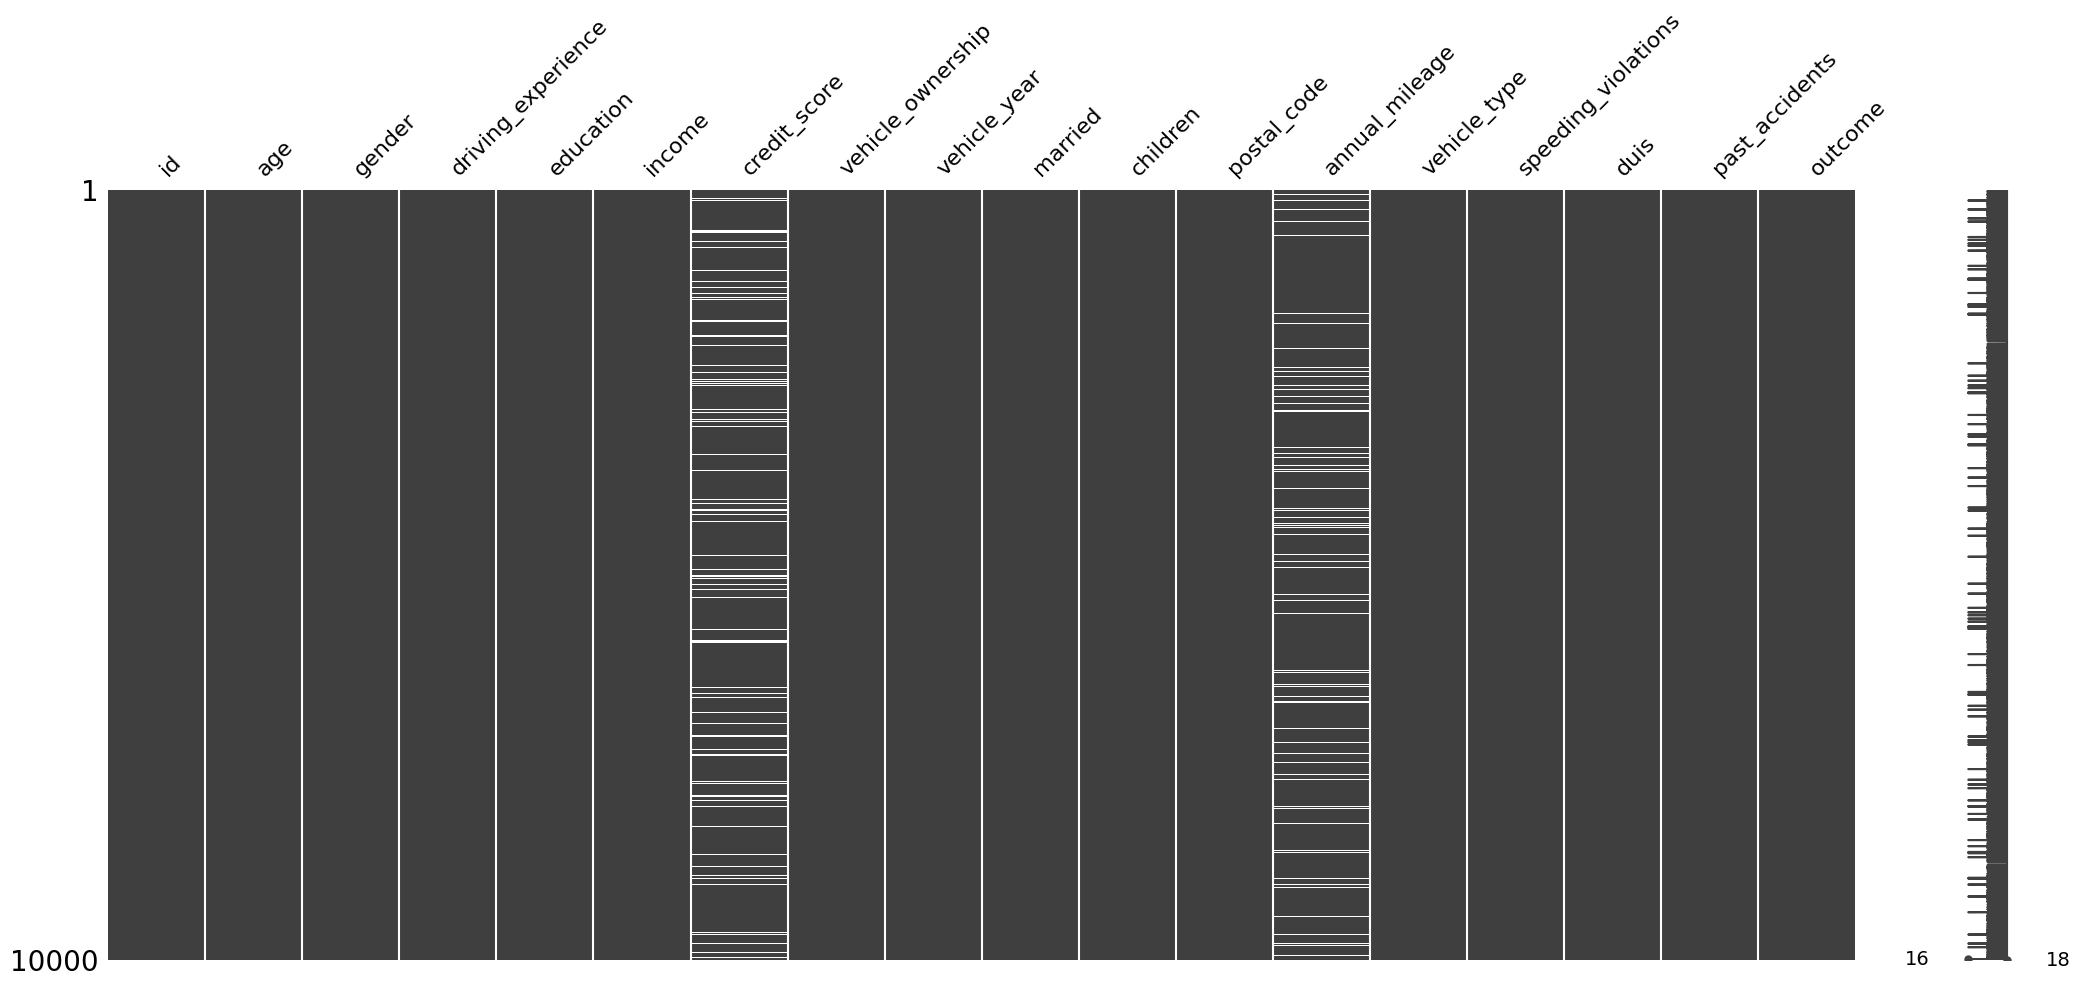

In [42]:
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic
# importing data, visualizing missing data 
df = pd.read_csv('car_insurance.csv')
print(df.info())
print(msno.matrix(df))
print(df.head(10))

# preparing data as requested by client and dealing with missing data

          id  age  gender  ...  duis  past_accidents  outcome
0     569520    3       0  ...     0               0      0.0
1     750365    0       1  ...     0               0      1.0
2     199901    0       0  ...     0               0      0.0
3     478866    0       1  ...     0               0      0.0
4     731664    1       1  ...     0               1      1.0
...      ...  ...     ...  ...   ...             ...      ...
9995  323164    1       0  ...     0               1      0.0
9996  910346    1       0  ...     0               0      0.0
9997  468409    1       1  ...     0               0      0.0
9998  903459    1       0  ...     0               1      1.0
9999  442696    1       0  ...     0               0      0.0

[10000 rows x 18 columns]
AxesSubplot(0.125,0.11;0.698618x0.77)


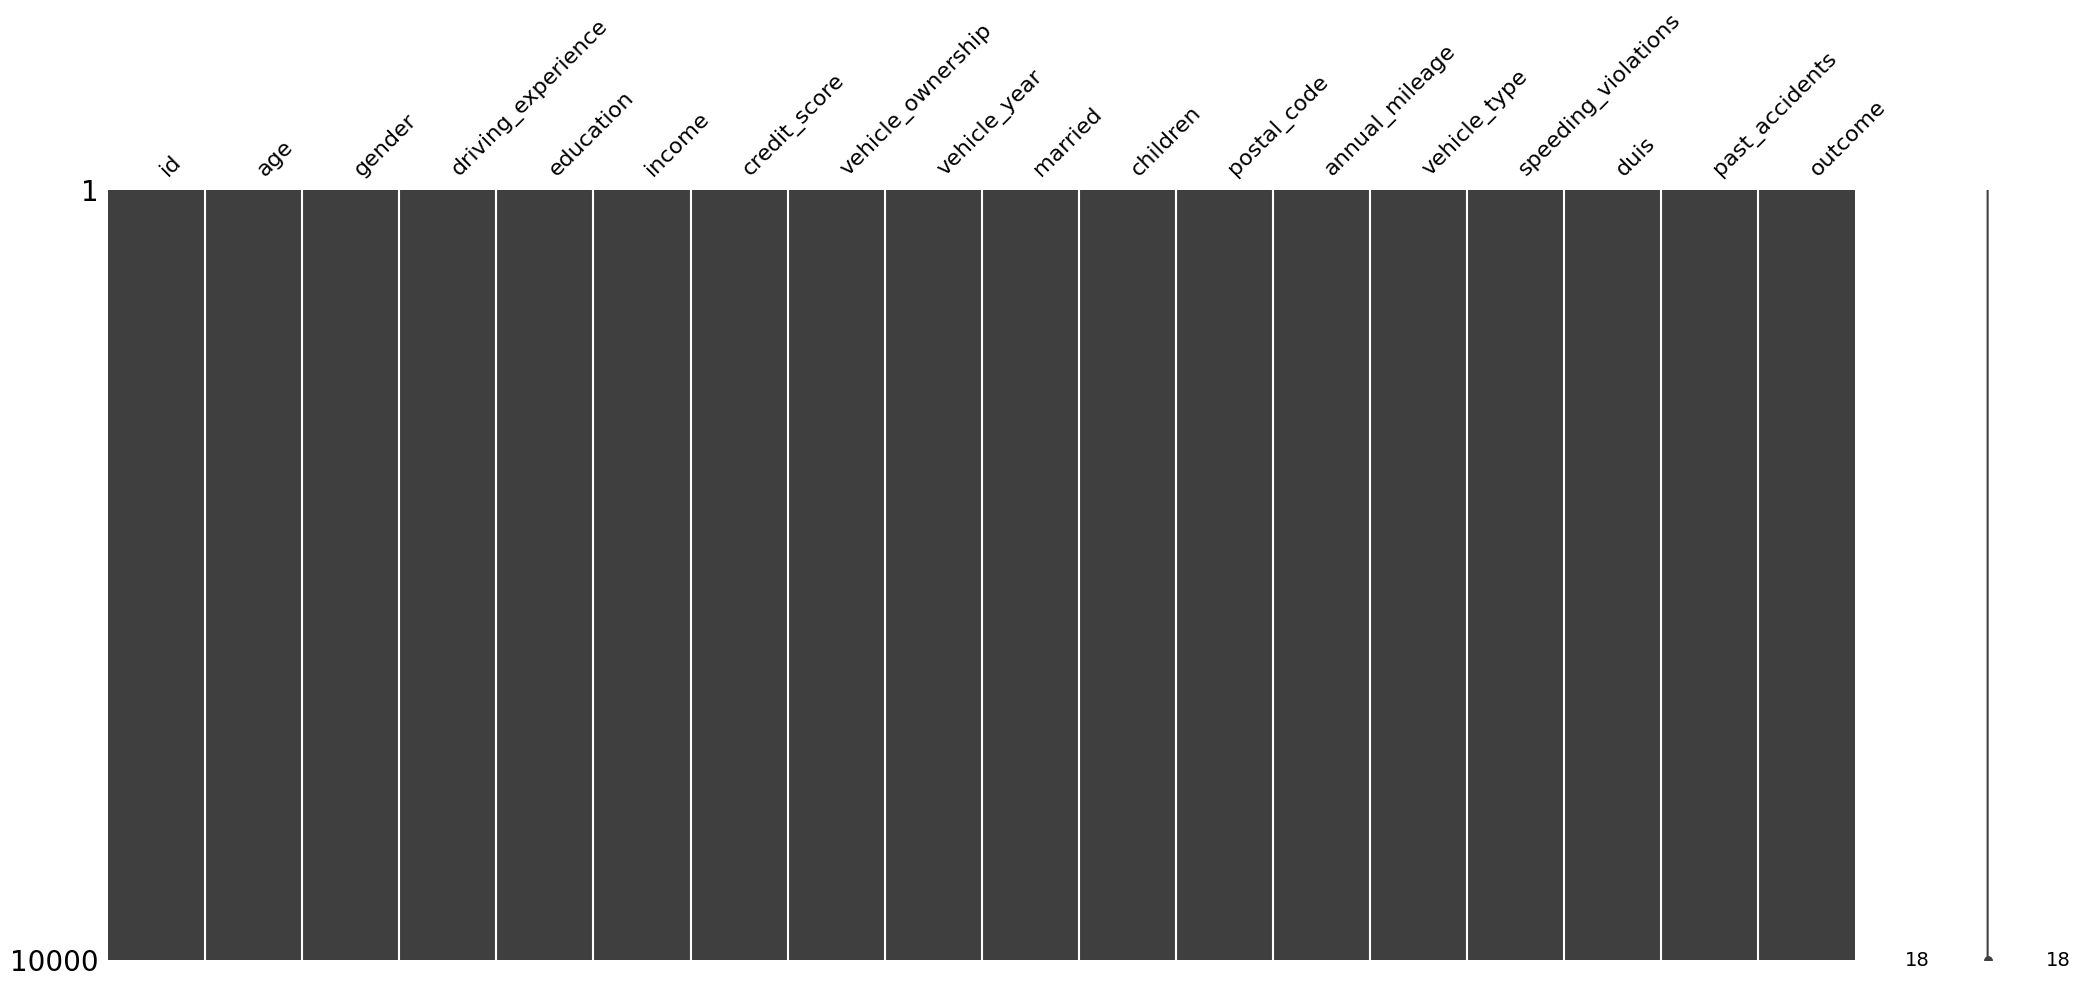

In [43]:
# turning listed columns to the numercial value assigned by the client
column_name_list = ['vehicle_type','married','vehcile_year','vehicle_ownership','income','education','driving_experience','gender','age']
dict_for_values_to_replace = {'0-9y':0,'10-19y':1,'20-29y':2,'30y+':3,'none':0,'high school':1,'university':2,'poverty':0,'working class':1,'middle class':2,'upper class':3,'after 2015':0,'before 2015':1,'sedan':0,'sports car':1}
df = df.replace(dict_for_values_to_replace)
print(df)
# since all the missing values in either score or annual milage therfore it can be filled instead with the mean
df['credit_score'] = df['credit_score'].fillna(np.mean(df['credit_score']))
df['annual_mileage'] = df['annual_mileage'].fillna(np.mean(df['annual_mileage']))
print(msno.matrix(df))

In [44]:
print(df.columns)
# modeling 
df['id']= df['id'].astype('int')
for column in df.columns:
    if column != 'id':    
        logit_model = logit(f'outcome ~ {column}',data = df).fit()
        print(logit_model.params)
        training_data = pd.DataFrame({f'{column}':np.arange(0,1,0.1)})
        training_data['mostly_claimed'] = logit_model.predict(training_data)
        print(f'{column}')
        matrix = logit_model.pred_table()
        TN = matrix[0,0]
        TP = matrix[1,1]
        FN = matrix[1,0]
        FP = matrix[0,1]
        # Calculate and print the accuracy
        accuracy = (TN + TP) / (TN + FN + FP + TP)
        print("accuracy: ", accuracy)
        # Calculate and print the sensitivity
        sensitivity = TP / (TP + FN)
        print("sensitivity: ", sensitivity)
        # Calculate and print the specificity
        specificity = TN / (TN + FP)
        print("specificity: ", specificity)
    else:
        continue
        
best_feature_df = pd.DataFrame({"best_feature":['driving_experience'],"best_accuracy": [0.7771]})

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Intercept    0.673040
age         -1.135579
dtype: float64
age
accuracy:  0.7747
sensitivity:  0.46217682732205556
specificity:  0.9172855686617154
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Intercept   -1.026966
gender       0.465146
dtype: float64
gender
accuracy:  0.6867
sensitivity:  0.0
specificity:  1.0
Optimization terminated successfully.
         Current function value: 0.467390
         Iterations 7
Intercept             0.515887
driving_experience   -1.668485
dtype: float64
driving_experience
accuracy:  0.7771
sensitiv

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

